Name: **Prasad Khalkar**<br>
Div: **BE-09 Q-09**<br>
Roll no: **43138**<br>
Title: **Assignment 2: Implementing Feedforward neural networks with Keras and TensorFlow**<br>

In [1]:
#installations
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

2022-11-07 09:56:15.328164: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 09:56:18.961882: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-07 09:56:18.961992: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-07 09:56:19.337709: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-07 09:56:24.354762: W tensorflow/stream_executor/platform/de

In [2]:
#grabbing the mnist dataset
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [3]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [4]:
#building the model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

2022-11-07 09:56:55.463532: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 09:56:55.464203: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-07 09:56:55.464359: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-11-07 09:56:55.464487: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-11-07 09:56:55.464603: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [5]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

2022-11-07 09:57:03.019311: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
469/469 [==============================] - 3s 3ms/step - loss: 2.2923 - accuracy: 0.2069 - val_loss: 2.2471 - val_accuracy: 0.3818
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 2.2200 - accuracy: 0.3669 - val_loss: 2.1858 - val_accuracy: 0.4041
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 2.1500 - accuracy: 0.4752 - val_loss: 2.1019 - val_accuracy: 0.5285
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 2.0516 - accuracy: 0.5529 - val_loss: 1.9830 - val_accuracy: 0.5796
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 1.9167 - accuracy: 0.5924 - val_loss: 1.8268 - val_accuracy: 0.6281
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 1.7497 - accuracy: 0.6372 - val_loss: 1.6474 - val_accuracy: 0.6770
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 1.5699 - accuracy: 0.6810 - val_loss: 1.4668 - val_accuracy: 0.6999
Epoch 

In [6]:
#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       980
           1       0.77      0.99      0.87      1135
           2       0.88      0.80      0.84      1032
           3       0.71      0.80      0.75      1010
           4       0.75      0.89      0.81       982
           5       0.82      0.51      0.63       892
           6       0.85      0.89      0.87       958
           7       0.77      0.87      0.82      1028
           8       0.84      0.54      0.66       974
           9       0.85      0.65      0.74      1009

    accuracy                           0.80     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.80      0.79     10000



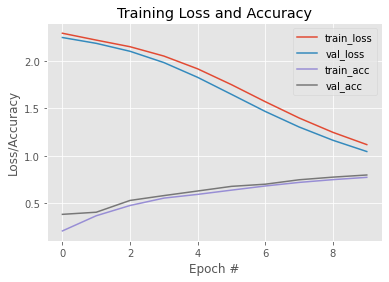

In [7]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()